In [3]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import json
import matplotlib
import matplotlib.cm as cm
import numpy as np
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
years = []
for i in range(2006,2019):
    years.append(str(i))

lower_listen_limit = 30
upper_listen_limit = 256

done


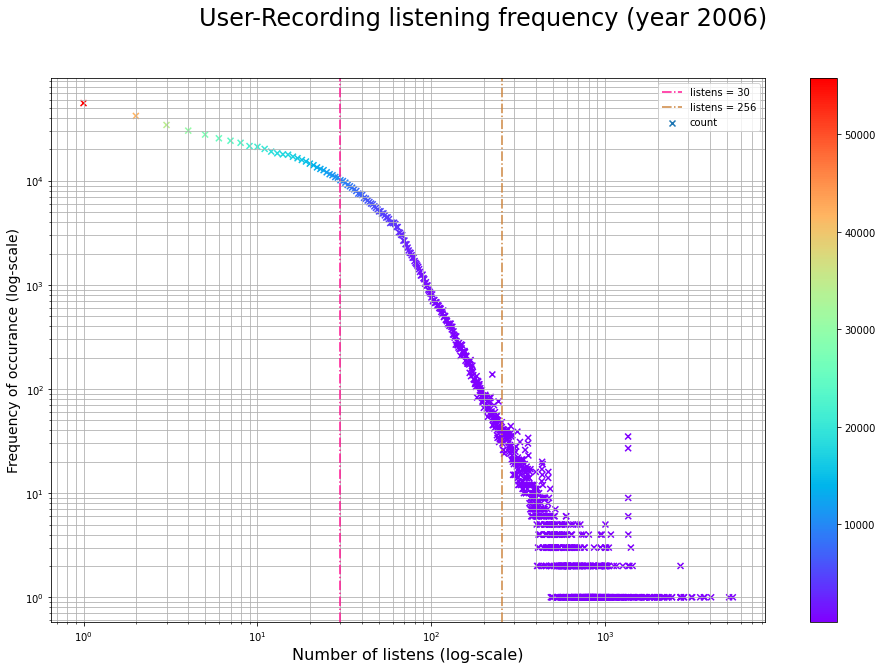

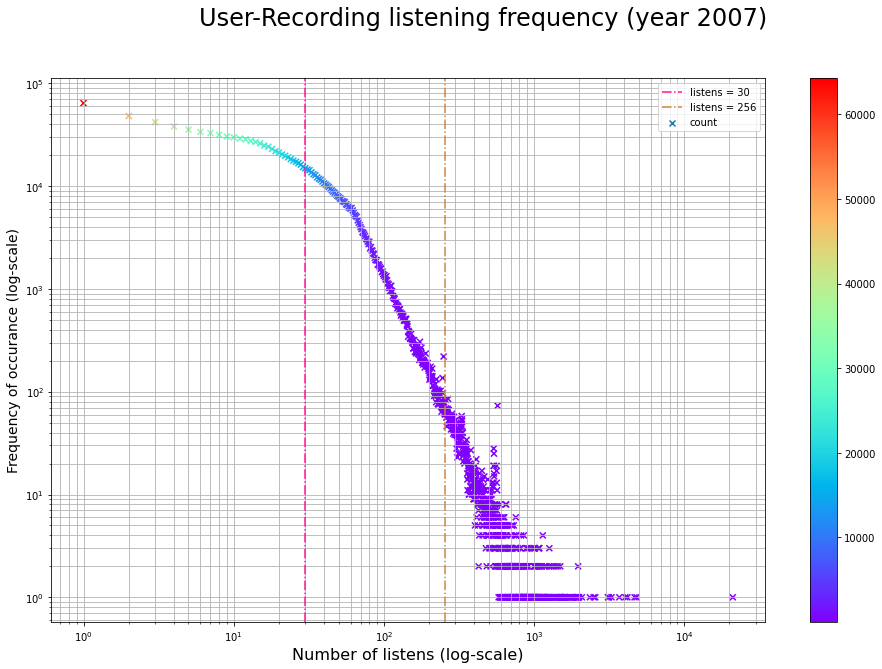

Error in callback <function flush_figures at 0x7f1824c91ca0> (for post_execute):


KeyboardInterrupt: 

In [13]:
for year in years:
    for f in glob("../out_data/yr_" + year + ".csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop 0 listens
        df = df[df.listens > 0] 

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening frequency (year "+year+")", fontsize=24)
        plt.grid(True, which="both", ls="-")
        plt.scatter(df["listens"], df["count"], marker='x', c=df["count"],  cmap=cm.rainbow, label = "count")
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens (log-scale)", fontsize=16)
        plt.ylabel("Frequency of occurance (log-scale)", fontsize=14)
        plt.xscale('log')
        plt.yscale('log')
        plt.colorbar()
        plt.legend()
        plt.savefig('images/'+year+"_all_listens_frequency_log_log.svg")
        plt.close(fig)
print('done')

done


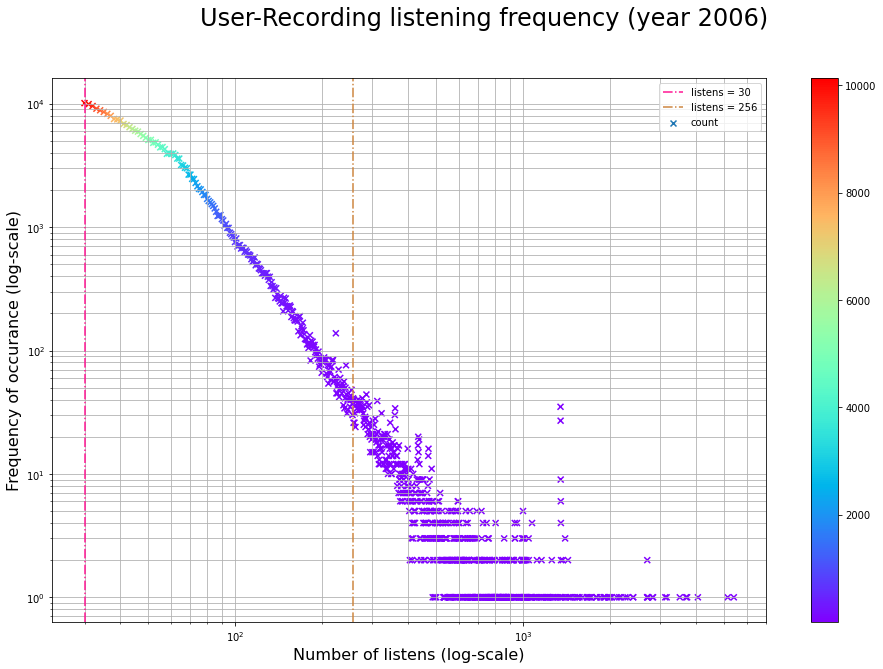

Error in callback <function flush_figures at 0x7f1824c91ca0> (for post_execute):


KeyboardInterrupt: 

In [14]:
for year in years:
    for f in glob("../out_data/yr_" + year + ".csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop 0 listens
        df = df[df.listens >= lower_listen_limit ] 

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening frequency (year "+year+")", fontsize=24)
        plt.grid(True, which="both", ls="-")
        plt.scatter(df["listens"], df["count"], marker='x', c=df["count"],  cmap=cm.rainbow, label = "count")
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens (log-scale)", fontsize=16)
        plt.ylabel("Frequency of occurance (log-scale)", fontsize=16)
        plt.xscale('log')
        plt.yscale('log')
        plt.colorbar()
        plt.legend()
        plt.savefig('images/'+year+"_above_"+str(lower_listen_limit)+"_listens_frequency_log_log.svg")
        plt.close(fig)

print('done')

done


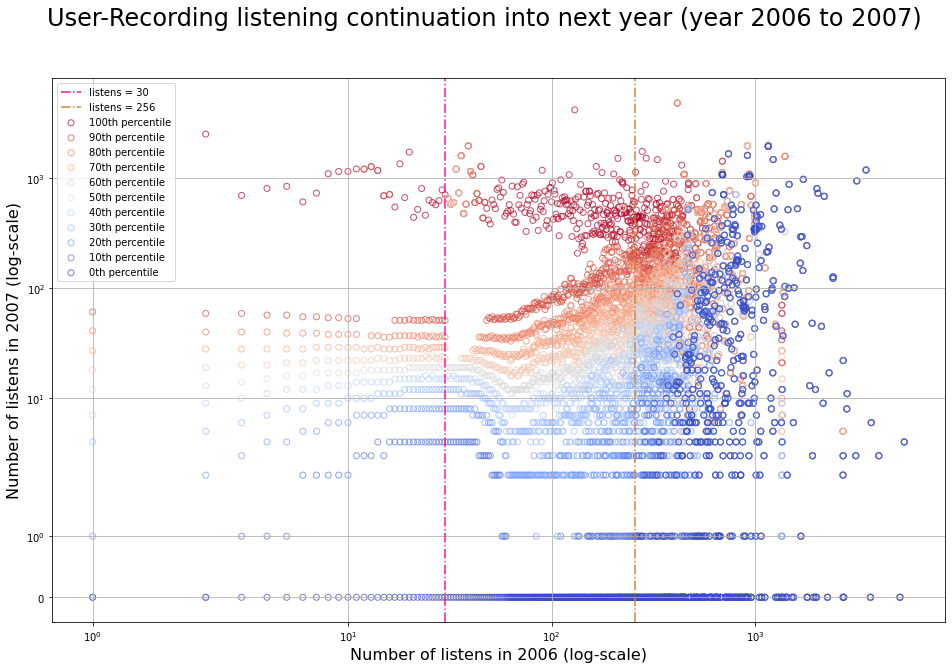

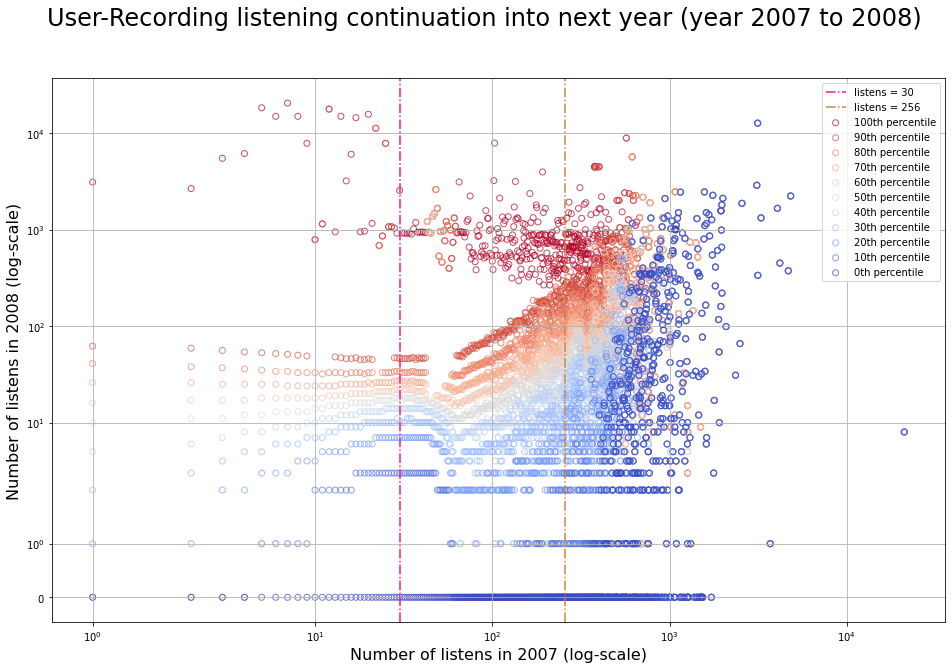

Error in callback <function flush_figures at 0x7f418d9bcb80> (for post_execute):


KeyboardInterrupt: 

In [17]:



for year in years:
    for f in glob("../out_data/yr_" + year + "_next_yr_percentiles.csv/part-*.csv"):
        df = pd.read_csv(f)
        #  drop edge cases that addect graph scaling
        # valid_mean = df['next_yr_mean'] != 0
        valid_count = df["yr_" + year] > 0
        # valid_std = df['next_yr_std'] != 0
        df = df[valid_count]

        fig = plt.figure(figsize=(16,10))
        fig.suptitle("User-Recording listening continuation into next year (year "+year+" to "+str(int(year)+1)+")", fontsize=24)
        for level in reversed(range(0,11)):
            rgba_color = cm.coolwarm(norm(level/10)) 
            plt.scatter(df["yr_" + year], df["percentile_" + str(level)], facecolors='none',
                        label = str(level*10) +"th percentile",
                        alpha=0.7,
                        # c=np.repeat(level*10, df.shape[0]),
                        # cmap=cm.viridis, rf,
                        color=rgba_color)

        plt.grid(True, which="both", ls="-")
        plt.xscale('symlog')
        plt.yscale('symlog')
        plt.axvline(x=lower_listen_limit, c='deeppink', linestyle='-.', label="listens = " + str(lower_listen_limit))
        plt.axvline(x=upper_listen_limit, c='peru', linestyle='-.', label="listens = " + str(upper_listen_limit))
        plt.xlabel("Number of listens in "+year+" (log-scale)", fontsize=16)
        plt.ylabel("Number of listens in "+str(int(year)+1)+" (log-scale)", fontsize=16)
        # plt.xlim((-0.1,1e3))
        # plt.ylim((-0.1,10e2))
        plt.legend()
        # plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
        # plt.close(fig)

print('done')

# User usage patterns

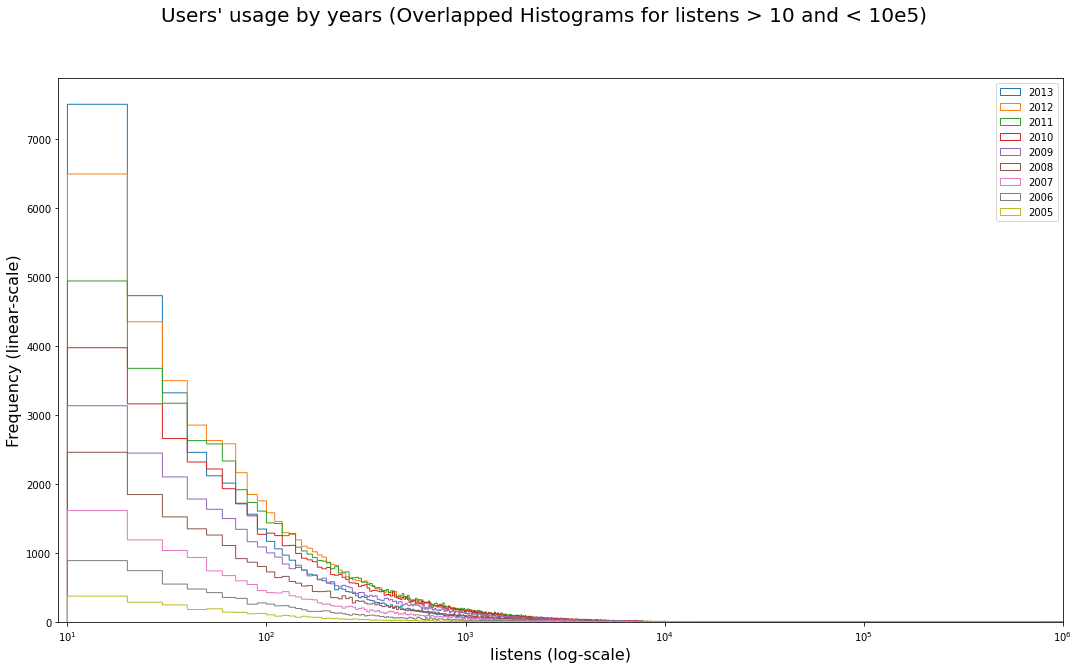

In [7]:
for f in glob("../out_data/user_listens_per_year.csv/part-*.csv"):
    df = pd.read_csv(f)
    fig = plt.figure(figsize=(18,10))
    fig.suptitle("Users' usage by years (Overlapped Histograms for listens > 10 and < 10e5)", fontsize=20)
    # plt.yscale('symlog')
    plt.xlim((9, 10e5))
    plt.xscale('symlog')
    plt.ylabel("Frequency (linear-scale)", fontsize=16)
    plt.xlabel("listens (log-scale)", fontsize=16)
    for year in reversed(range(2005, 2014)):
        yr = str(year)
        plt.hist(df["sum(yr_"+yr+")"],
            range = (10, 10e5),
            bins=int(10e4),
            histtype='step',
            label=yr,
            )
    plt.legend()

##  Subscribed users by years

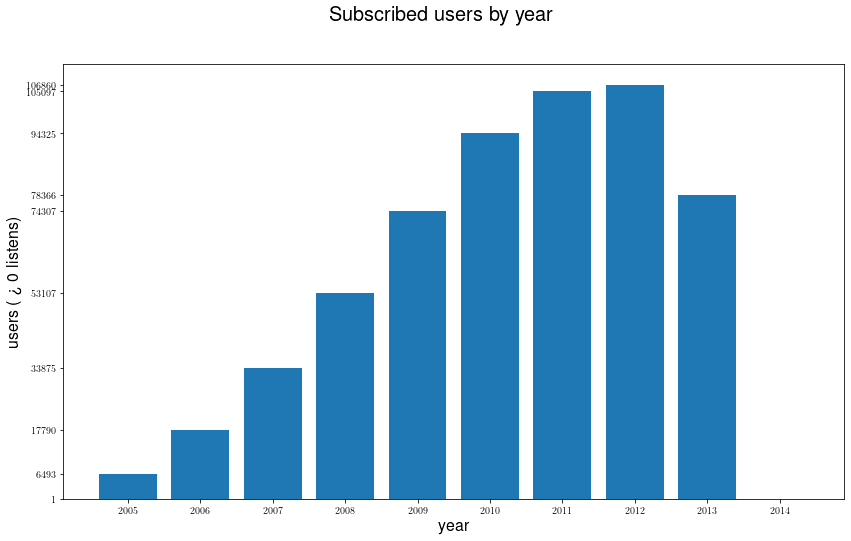

In [18]:
years = range(2005, 2015)
for f in glob("../out_data/user_listens_per_year.csv/part-*.csv"):
    df = pd.read_csv(f)
    sizes = []
    for year in reversed(years):
        yr = str(year)
        size = df[df["sum(yr_"+yr+")"] != 0]["sum(yr_"+yr+")"].size
        sizes.append(size)
    sizes = list(reversed(sizes))
    fig = plt.figure(figsize=(14,8))
    fig.suptitle("Subscribed users by year", fontsize = 20)
    plt.xticks(years)
    plt.xlabel("year", fontsize = 16)
    plt.ylabel("users ( > 0 listens)", fontsize = 16)
    plt.yticks(sizes)
    plt.bar(years, sizes)

# Listen Quantile distributions by year

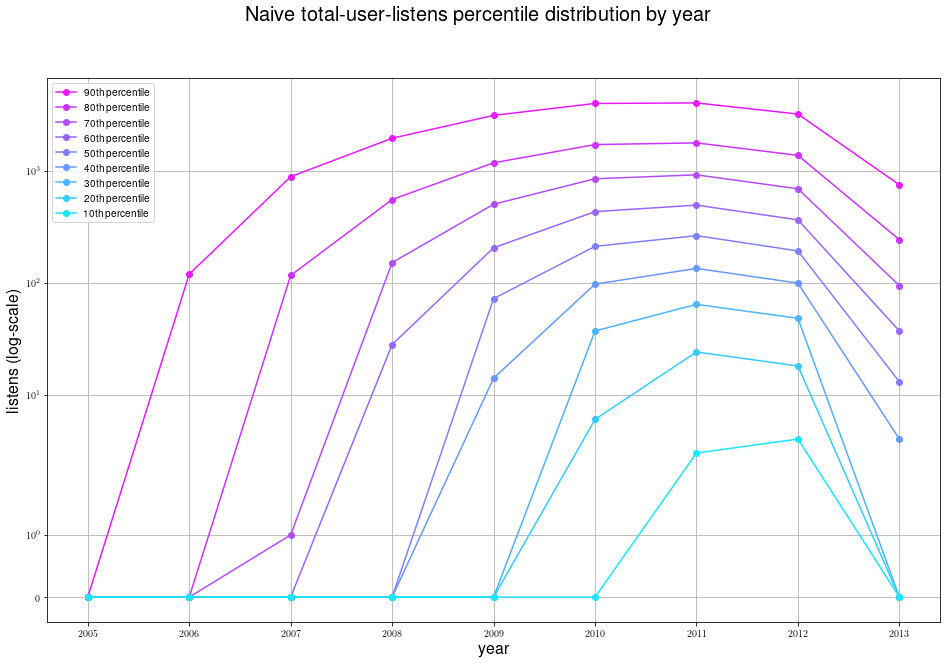

In [5]:
with open('../out_data/user_rec_listen_percentiles_by_year.json', 'rb') as f:
    data = json.load(f)
# Restructure database
arr = []
for year in range(2005, 2014):
    a = list([year])
    for p in data[str(year)]:
        a.append(p)
    arr.append(a)
arr = np.array(arr)

fig = plt.figure(figsize=(16,10))
fig.suptitle("Naive total-user-listens percentile distribution by year", fontsize=20)
plt.grid(True, which="both", ls="-")
plt.yscale('symlog')
plt.xticks(range(2005, 2014))
plt.xlabel("year", fontsize = 16)
plt.ylabel("listens (log-scale)", fontsize = 16)

for level in reversed(range(1,10)):
    rgba_color = cm.cool(norm(level/10)) 
    plt.plot(arr[:,0], arr[:,level+1], 
                label = str(level*10) +"th percentile",
                marker='o',
                color=rgba_color)
plt.legend()
# plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
# plt.close(fig)

# Subscribers

#  total-user-listens percentile Normalised over subscrivbers

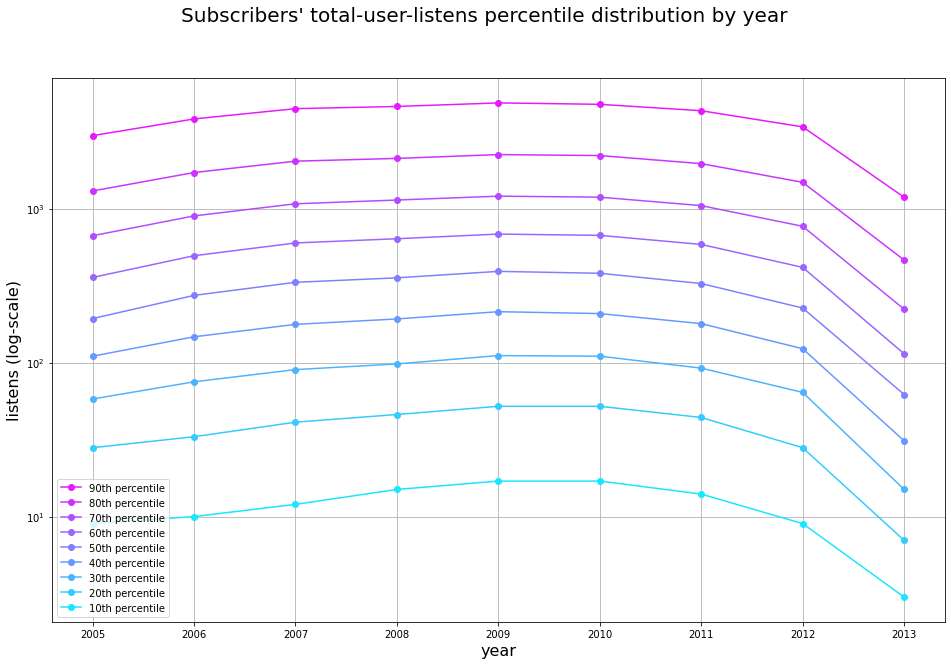

In [8]:
with open('../out_data/normalised_user_rec_listen_percentiles_by_year.json', 'rb') as f:
    data = json.load(f)

# Restructure database
arr = []
for year in range(2005, 2014):
    a = list([year])
    for p in data[str(year)]:
        a.append(p)
    arr.append(a)
arr = np.array(arr)

fig = plt.figure(figsize=(16,10))
fig.suptitle("Subscribers' total-user-listens percentile distribution by year", fontsize=20)
plt.grid(True, which="both", ls="-")
plt.yscale('symlog')
plt.xticks(range(2005, 2014))
plt.xlabel("year", fontsize = 16)
plt.ylabel("listens (log-scale)", fontsize = 16)

for level in reversed(range(1,10)):
    rgba_color = cm.cool(norm(level/10)) 
    plt.plot(arr[:,0], arr[:,level+1], 
                label = str(level*10) +"th percentile",
                marker='o',
                color=rgba_color)
plt.legend()
# plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
# plt.close(fig)

# Active users

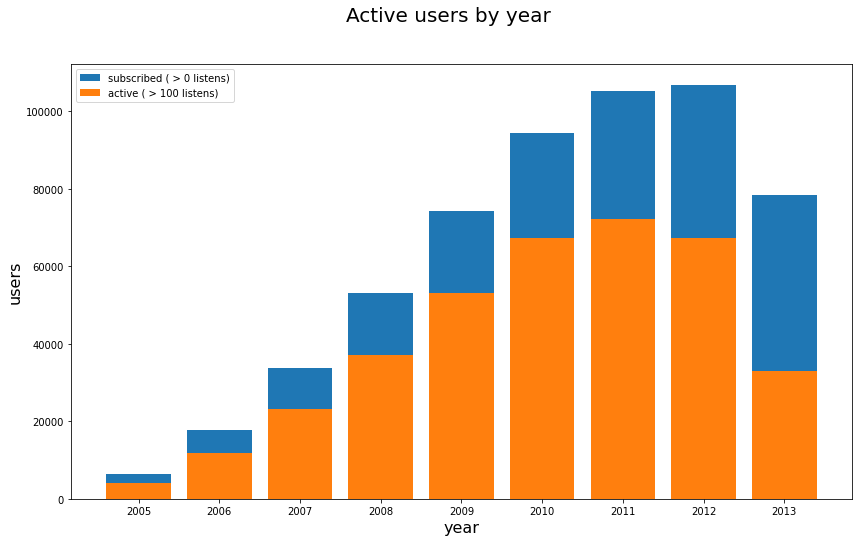

In [69]:
years = range(2005, 2014)
active_sizes=[]
subscribed_sizes=[]
for year in years:
    for f in glob("../out_data/year_" + str(year) + "_active_users.csv/part-*.csv"):
        df = pd.read_csv(f)
        active_sizes.append(df.size)
    for f in glob("../out_data/year_" + str(year) + "_subscribers.csv/part-*.csv"):
        df = pd.read_csv(f)
        subscribed_sizes.append(df.size)

fig = plt.figure(figsize=(14,8))
fig.suptitle("Active users by year", fontsize = 20)
plt.xticks(years)
plt.xlabel("year", fontsize = 16)
plt.ylabel("users", fontsize = 16,)
plt.bar(years, subscribed_sizes, label="subscribed users ( > 0 listens)")
plt.bar(years, active_sizes, label="active users ( > 100 listens)")
plt.legend()

#  total-user-listens percentile Normalised over Active users

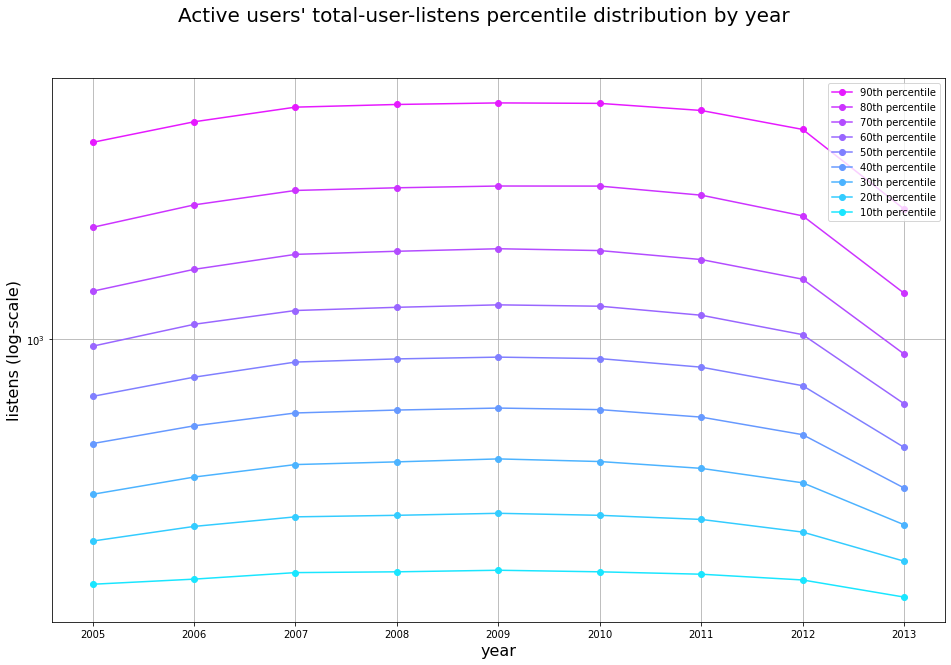

In [7]:
years = range(2005, 2014)
with open('../out_data/active_users_normalised_user_rec_listen_percentiles_by_year.json', 'rb') as f:
    data = json.load(f)

# Restructure database
arr = []
for year in range(2005, 2014):
    a = list([year])
    for p in data[str(year)]:
        a.append(p)
    arr.append(a)
arr = np.array(arr)

fig = plt.figure(figsize=(16,10))
fig.suptitle("Active users' total-user-listens percentile distribution by year", fontsize=20)
plt.grid(True, which="both", ls="-")
plt.yscale('symlog')
plt.xticks(years)
plt.xlabel("year", fontsize = 16)
plt.ylabel("listens (log-scale)", fontsize = 16)

for level in reversed(range(1,10)):
    rgba_color = cm.cool(norm(level/10)) 
    plt.plot(arr[:,0], arr[:,level+1], 
                label = str(level*10) +"th percentile",
                marker='o',
                color=rgba_color)
plt.legend()
# plt.savefig('images/'+year+"_next_year_percentiles_log_log.svg")
# plt.close(fig)

# Selecting threshold for Active users

In [3]:
years = range(2005, 2013)
thresholds = [10, 25, 50, 75, 100, 250, 500, 750, 1000, 2500, 5000, 7500, 10000, 25000, 50000, 75000, 100000]
percentiles = range(10,100, 10)

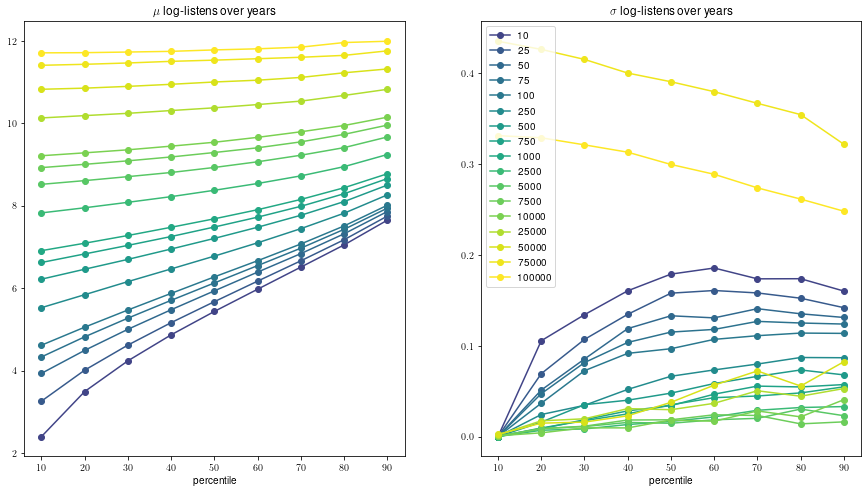

In [38]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
t_means = []
t_std = []
for t in thresholds:
    with open('../out_data/active_users_normalised_user_rec_listen_percentiles_by_year_threshold_'+str(t)+'.json', 'rb') as f:
        data = json.load(f)
    
    # Restructure database
    arr = []
    for year in years:
        a = list([year])
        for p in data[str(year)]:
            a.append(p)
        arr.append(a)
    arr = np.array(arr)
    vfunc = np.vectorize(np.log)
    log_scale_data = vfunc(arr)

    mean = np.mean(log_scale_data, axis=0)[1:10]
    std = np.std(log_scale_data, axis=0)[1:10]
    t_means.append(mean)
    t_std.append(std)

    rgba_color = cm.viridis(norm(np.log(t)/np.log(100000))) 
    ax[0].plot(percentiles, mean, 
        label = str(t),
        marker='o',
        color=rgba_color)
    ax[1].plot(percentiles, std, 
        label = str(t),
        marker='o',
        color=rgba_color)

ax[0].set_title("percentile")
ax[0].set_xlabel("percentile")
ax[0].set_title("$\mu$ log-listens over years")
ax[1].set_xlabel("percentile")
ax[1].set_title("$\sigma$ log-listens over years")
plt.legend()
plt.savefig('../images/active-threshold-percentile-mean-std.svg')

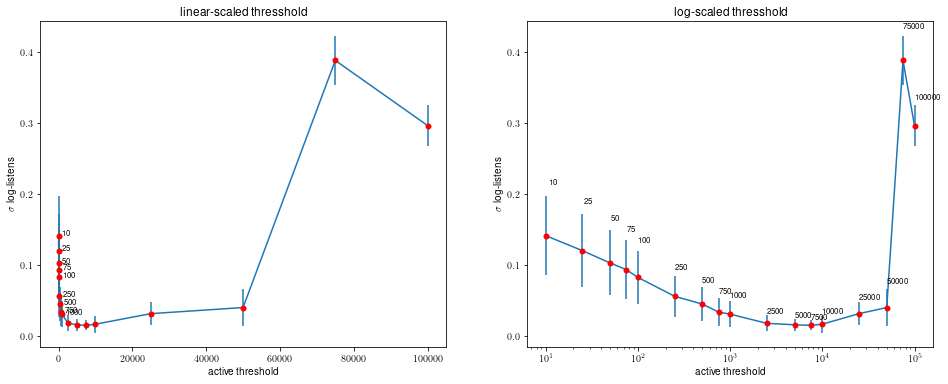

In [41]:
t_std = np.array(t_std)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
mean_of_std = np.mean(t_std, axis=1)
std_of_std = np.std(t_std, axis=1)
ax[0].set_title("linear-scaled thresshold")
ax[0].set_xscale('linear')
ax[0].set_ylabel('$\sigma$ log-listens')
ax[0].set_xlabel('active threshold')
ax[0].errorbar(thresholds, y=mean_of_std, yerr=std_of_std, marker='o', markeredgewidth=0.001, markerfacecolor='red')

ax[1].set_title("log-scaled thresshold")
ax[1].set_xscale('log')
ax[1].set_ylabel('$\sigma$ log-listens')
ax[1].set_xlabel('active threshold')
ax[1].errorbar(thresholds, y=mean_of_std, yerr=std_of_std, marker='o', markeredgewidth=0.001, markerfacecolor='red')

for i in range(len(thresholds)-8):
    ax[0].text(thresholds[i]+1000, mean_of_std[i] , thresholds[i], fontsize=8)

for i in range(len(thresholds)):
    ax[1].text(thresholds[i]+1, mean_of_std[i] + (std_of_std[i]*1.3), thresholds[i], fontsize=8)

plt.savefig('../images/active-threshold-std-curve.svg')

# How does threshold affect size of dataset? ($ \tau = 750$)

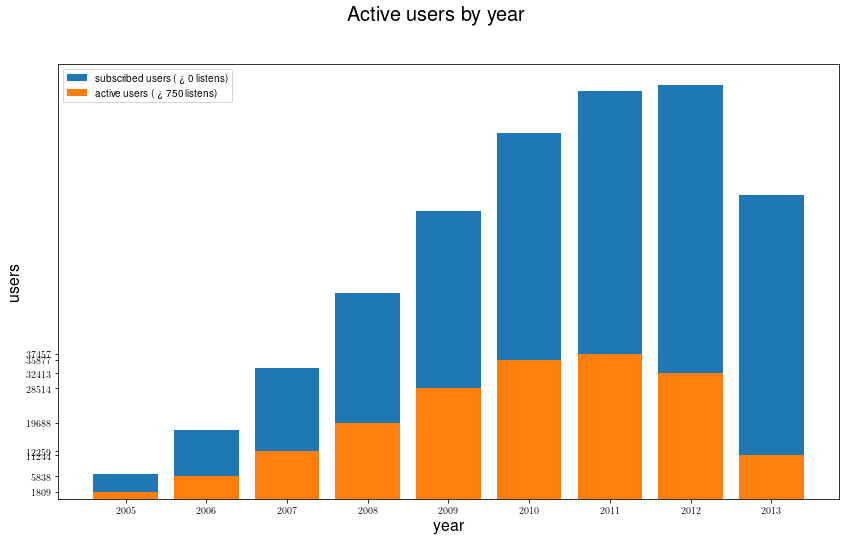

In [20]:
years = range(2005, 2014)
active_sizes=[]
subscribed_sizes=[]
tau_active = 750
for year in years:
    for f in glob("../out_data/year_" + str(year) + "_active_users_threshold_"+str(tau_active)+".csv/part-*.csv"):
        df = pd.read_csv(f)
        active_sizes.append(df.size)
    for f in glob("../out_data/year_" + str(year) + "_subscribers.csv/part-*.csv"):
        df = pd.read_csv(f)
        subscribed_sizes.append(df.size)

fig = plt.figure(figsize=(14,8))
fig.suptitle("Active users by year", fontsize = 20)
plt.xticks(years)
plt.xlabel("year", fontsize = 16)
plt.ylabel("users", fontsize = 16,)
plt.bar(years, subscribed_sizes, label="subscribed users ( > 0 listens)")
plt.bar(years, active_sizes, label="active users ( > "+str(tau_active)+" listens)")
plt.yticks(active_sizes)
plt.legend()